In [123]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image
import requests
from soccerplots.radar_chart import Radar
from PIL import Image

In [124]:
league = 'Championship'
if league == 'Premier League':
    url = f'https://fbref.com/en/comps/9/stats/{league[0]}-{league[1]}-Stats#all_stats_standard'
    response = requests.get(url).text.replace('<!--', '').replace('-->', '')
    df_player = pd.read_html(response, header = 1)[2]
else:
    url = f'https://fbref.com/en/comps/10/stats/{league}-Stats#all_stats_standard'
    response = requests.get(url).text.replace('<!--', '').replace('-->', '')
    df_standard = pd.read_html(response, header = 1)[2]

ConnectionError: HTTPSConnectionPool(host='fbref.com', port=443): Max retries exceeded with url: /en/comps/10/stats/Championship-Stats (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001E914E3DC50>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [ ]:
df_standard = df_standard[df_standard['Rk'] != 'Rk']
df_standard = df_standard[df_standard['Squad'] == 'Norwich City'].reset_index(drop = True)
df_standard.rename(columns = {'Gls.1': 'Gls p90', 'Ast.1':'Ast p90','G+A.1':'G+A', 'G-PK.1':'G-PK p90', 'G+A-PK.1':'G+A-PK p90', 'xG.1':'xG p90', 'xAG.1':'xAG p90', 'xG+xA':'xG+xA p90', 'npxG.1':'npxG p90', 'npxG+xA.1':'npxG+xA p90'}, inplace = True)

In [ ]:
url = 'https://fbref.com/en/comps/10/passing/Championship-Stats#all_stats_passing'
response = requests.get(url).text.replace('<!--', '').replace('-->', '')
df_passing = pd.read_html(response, header = 1)[2]
df_passing = df_passing[df_passing['Rk'] != 'Rk']
df_passing = df_passing[df_passing['Squad'] == 'Norwich City'].reset_index(drop = True)
df_passing = df_passing.drop(['Rk','Nation','Pos','Squad','Age','Born','Matches','90s','Ast','xAG','A-xAG','Cmp.1','Att.1','Cmp%.1','Cmp.2','Att.2','Cmp%.2','Cmp.3','Att.3','Cmp%.3','PrgP'], axis = 1)
df_passing.rename(columns = {'Cmp': 'Passes Completed','Att':'Passes Attempted', 'Cmp%':'Pass Completion %', 'TotDist':'Total Pass Dist', 'PrgDist':'Prog Pass Dist', '1/3':'Final 3rd Passes','PPA':'Passes into PA', 'CrsPA':'Crosses into PA'}, inplace = True)

In [ ]:
url = 'https://fbref.com/en/comps/10/shooting/Championship-Stats#all_stats_shooting'
response = requests.get(url).text.replace('<!--', '').replace('-->', '')
df_shooting = pd.read_html(response, header = 1)[2]
df_shooting = df_shooting[df_shooting['Rk'] != 'Rk']
df_shooting = df_shooting[df_shooting['Squad'] == 'Norwich City'].reset_index(drop = True)
df_shooting = df_shooting.drop(['Rk','Nation','Pos','Squad','Age','Born','Matches','90s','Gls','xG','npxG'], axis = 1)
df_shooting.rename(columns = {'Dist':'Avg Shot Dist','FK':'Shots from FK','PK':'PK Goals'}, inplace = True)

In [ ]:
url = 'https://fbref.com/en/comps/10/gca/Championship-Stats#all_stats_gca'
response = requests.get(url).text.replace('<!--', '').replace('-->', '')
df_gca = pd.read_html(response, header = 1)[2]
df_gca = df_gca[df_gca['Rk'] != 'Rk']
df_gca = df_gca[df_gca['Squad'] == 'Norwich City'].reset_index(drop = True)
df_gca = df_gca.drop(['Rk','Nation','Pos','Squad','Age','Born','Matches','90s','PassLive.1','PassDead.1','TO.1','Sh.1','Fld.1','Def.1','PassLive','PassDead','TO','Sh','Fld','Def'], axis = 1)

In [ ]:
url = 'https://fbref.com/en/comps/10/defense/Championship-Stats#all_stats_defense'
response = requests.get(url).text.replace('<!--', '').replace('-->', '')
df_defence = pd.read_html(response, header = 1)[2]
df_defence = df_defence[df_defence['Rk'] != 'Rk']
df_defence = df_defence[df_defence['Squad'] == 'Norwich City'].reset_index(drop = True)
df_defence = df_defence.drop(['Rk','Nation','Pos','Squad','Age','Born','Matches','90s','Tkl.1','Att','Tkl%','Lost', 'Def 3rd','Mid 3rd','Att 3rd'], axis = 1)
df_defence.rename(columns = {'Sh':'Sh Blocked','Pass':'Pass Blocked'}, inplace = True)

In [ ]:
url = 'https://fbref.com/en/comps/10/possession/Championship-Stats#all_stats_possession'
response = requests.get(url).text.replace('<!--', '').replace('-->', '')
df_possession = pd.read_html(response, header = 1)[2]
df_possession = df_possession[df_possession['Rk'] != 'Rk']
df_possession = df_possession[df_possession['Squad'] == 'Norwich City'].reset_index(drop = True)
df_possession = df_possession.drop(['Rk','Nation','Pos','Squad','Age','Born','Matches','90s','Touches','Def Pen','Def 3rd','Mid 3rd','Att 3rd','Att Pen','Live'], axis = 1)
df_possession.rename(columns = {'Succ':'Successful Take-Ons','Att':'Attempted Take-Ons','Succ%':'Take-On Success %','Tkld':'Tackled During Take-Ons','Tkld%':'Tackled During Take-Ons %','TotDist':'Total Carry Dist','PrgDist':'Prog Carry Dist','1/3':'Carries into final 3rd','CPA':'Carries into PA','Mis':'Miscontrols','Dis':'Dispossessed','Rec':'Passes Recieved','PrgR':'Prog Passes Received'}, inplace = True)

In [ ]:
url = 'https://fbref.com/en/comps/10/playingtime/Championship-Stats#all_stats_playing_time'
response = requests.get(url).text.replace('<!--', '').replace('-->', '')
df_playtime = pd.read_html(response, header = 1)[2]
df_playtime = df_playtime[df_playtime['Rk'] != 'Rk']
df_playtime = df_playtime[df_playtime['Squad'] == 'Norwich City'].reset_index(drop = True)
df_playtime = df_playtime.drop(['MP','Rk','Nation','Pos','Squad','Age','Born','Matches','90s','Min'], axis = 1)
df_playtime.rename(columns = {'Compl':'Matches Completed'}, inplace = True)

In [ ]:
url = 'https://fbref.com/en/comps/10/misc/Championship-Stats#all_stats_misc'
response = requests.get(url).text.replace('<!--', '').replace('-->', '')
df_misc = pd.read_html(response, header = 1)[2]
df_misc = df_misc[df_misc['Rk'] != 'Rk']
df_misc = df_misc[df_misc['Squad'] == 'Norwich City'].reset_index(drop = True)
df_misc = df_misc.drop(['Rk','Nation','Pos','Squad','Age','Born','Matches','90s','TklW','Int'], axis = 1)
df_misc.rename(columns = {'Fls':'Fls Committed','Fld':'Fls Drawn','Recov':'Ball Recoveries','Won%':'Aerial win %','Won':'Aerial Duels Won','Lost':'Aerial Duels Lost'}, inplace = True)

In [ ]:
#df = pd.concat([df_standard, df_passing, df_shooting, df_passtypes, df_gca, df_defence, df_possession, df_playtime, df_misc], axis = 1)

In [ ]:
df = pd.merge(df_standard, df_passing, on = 'Player', how = 'inner')
df = pd.merge(df, df_shooting, on = 'Player', how = 'inner')
df = pd.merge(df, df_gca, on = 'Player', how = 'inner')
df = pd.merge(df, df_defence, on = 'Player', how = 'inner')
df = pd.merge(df, df_possession, on = 'Player', how = 'inner')
df = pd.merge(df, df_playtime, on = 'Player', how = 'inner')
df = pd.merge(df, df_misc, on = 'Player', how = 'inner')

In [ ]:
print(df.columns.tolist())

['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', 'MP', 'Starts_x', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt_x', 'CrdY_x', 'CrdR_x', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC_x', 'PrgP', 'PrgR', 'Gls p90', 'Ast p90', 'G+A', 'G-PK p90', 'G+A-PK', 'xG p90', 'xAG p90', 'xG+xAG', 'npxG p90', 'npxG+xAG.1', 'Matches', 'Passes Completed', 'Passes Attempted', 'Pass Completion %', 'Total Pass Dist', 'Prog Pass Dist', 'xA', 'KP', 'Final 3rd Passes', 'Passes into PA', 'Crosses into PA', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Avg Shot Dist', 'Shots from FK', 'PK Goals', 'PKatt_y', 'npxG/Sh', 'G-xG', 'np:G-xG', 'SCA', 'SCA90', 'GCA', 'GCA90', 'Tkl', 'TklW', 'Blocks', 'Sh Blocked', 'Pass Blocked', 'Int', 'Tkl+Int', 'Clr', 'Err', 'Attempted Take-Ons', 'Successful Take-Ons', 'Take-On Success %', 'Tackled During Take-Ons', 'Tackled During Take-Ons %', 'Carries', 'Total Carry Dist', 'Prog Carry Dist', 'PrgC_y', 'Carries into final 3rd', 'Carries into PA', 'Miscontr

In [ ]:
df = df.drop(['Starts_x','PKatt_x','CrdY_x','CrdR_x','PrgC_x'], axis = 1)
df.rename(columns = {'Starts_y':'Starts','PKatt_y':'PKatt','CrdY_y':'CrdY','CrdR_y':'CrdR','PrgC_y':'PrgC'}, inplace = True)

In [223]:
df_compare = df[22:24]

In [ ]:
print(df_compare.columns.tolist())

['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', 'MP', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgP', 'PrgR', 'Gls p90', 'Ast p90', 'G+A', 'G-PK p90', 'G+A-PK', 'xG p90', 'xAG p90', 'xG+xAG', 'npxG p90', 'npxG+xAG.1', 'Matches', 'Passes Completed', 'Passes Attempted', 'Pass Completion %', 'Total Pass Dist', 'Prog Pass Dist', 'xA', 'KP', 'Final 3rd Passes', 'Passes into PA', 'Crosses into PA', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Avg Shot Dist', 'Shots from FK', 'PK Goals', 'PKatt', 'npxG/Sh', 'G-xG', 'np:G-xG', 'SCA', 'SCA90', 'GCA', 'GCA90', 'Tkl', 'TklW', 'Blocks', 'Sh Blocked', 'Pass Blocked', 'Int', 'Tkl+Int', 'Clr', 'Err', 'Attempted Take-Ons', 'Successful Take-Ons', 'Take-On Success %', 'Tackled During Take-Ons', 'Tackled During Take-Ons %', 'Carries', 'Total Carry Dist', 'Prog Carry Dist', 'PrgC', 'Carries into final 3rd', 'Carries into PA', 'Miscontrols', 'Dispossessed', 'Passes Recieved', 'Prog Passes Rec

In [224]:
df_compare = df_compare[['Player','Gls','Ast','PrgC','Pass Completion %','KP','Tkl+Int','Attempted Take-Ons','Dispossessed','xA','xG','Ball Recoveries']]
df_compare.rename(columns = {'Gls':'Goals','Ast':'Assists','PrgC':'Progressive Carries','KP':'Key Pass', 'Tkl+Int':'Tackles + Interceptions','Attempted Take-Ons':'Take-Ons','Dispossessed':'Dispossessed','xA':'Expected Assists','xG':'Expected Goals','Pass Completion %':'Pass Comp %'}, inplace = True)
df_compare.reset_index(drop = True, inplace = True)
df_compare[['Goals','Assists','Progressive Carries','Pass Comp %','Key Pass','Tackles + Interceptions','Take-Ons','Dispossessed','Expected Assists','Expected Goals']] = df_compare[['Goals','Assists','Progressive Carries','Pass Comp %','Key Pass','Tackles + Interceptions','Take-Ons','Dispossessed','Expected Assists','Expected Goals']].astype(float)
df_compare[['Goals','Assists','Progressive Carries','Pass Comp %','Key Pass','Tackles + Interceptions','Take-Ons','Dispossessed','Ball Recoveries']] = df_compare[['Goals','Assists','Progressive Carries','Pass Comp %','Key Pass','Tackles + Interceptions','Take-Ons','Dispossessed','Ball Recoveries']].astype(int)
df_compare = df_compare[['Player','Goals','Expected Goals','Progressive Carries','Key Pass','Dispossessed','Assists','Expected Assists','Ball Recoveries','Take-Ons','Pass Comp %','Tackles + Interceptions']]

In [225]:
params = list(df_compare.columns)
params = params[1:]
params

['Goals',
 'Expected Goals',
 'Progressive Carries',
 'Key Pass',
 'Dispossessed',
 'Assists',
 'Expected Assists',
 'Ball Recoveries',
 'Take-Ons',
 'Pass Comp %',
 'Tackles + Interceptions']

In [226]:
# Range
ranges = []
a_values = []   
b_values = []

for x in params:
    a = min(df_compare[params][x])
    a = a - (a*0.5)
    b = max(df_compare[params][x])
    b = b + (b*0.15)
    #ranges.append((a,b))

for x in range(len(df_compare['Player'])):
    if df_compare['Player'][x] == 'Jon Rowe':
        a_values = df_compare.iloc[x].values.tolist()
    if df_compare['Player'][x] == 'Borja Sainz':
        b_values = df_compare.iloc[x].values.tolist()

In [227]:
df_compare

,Player,Goals,Expected Goals,Progressive Carries,Key Pass,Dispossessed,Assists,Expected Assists,Ball Recoveries,Take-Ons,Pass Comp %,Tackles + Interceptions
0,Jon Rowe,12,5.3,76,24,26,2,1.3,90,82,71,58
1,Borja Sainz,6,4.8,53,21,40,2,2.5,134,102,85,77


In [228]:
ranges = [(0,15),(0,9),(0,90),(0,36),(63,0),(0,9),(0,9),(0,180),(0,135),(10,100),(10,100)]
ranges

[(0, 15),
 (0, 9),
 (0, 90),
 (0, 36),
 (63, 0),
 (0, 9),
 (0, 9),
 (0, 180),
 (0, 135),
 (10, 100),
 (10, 100)]

In [229]:
a_values = a_values[1:]
b_values = b_values[1:]  

In [230]:
values = [a_values,b_values]
values

[[12, 5.3, 76, 24, 26, 2, 1.3, 90, 82, 71, 58],
 [6, 4.8, 53, 21, 40, 2, 2.5, 134, 102, 85, 77]]

In [231]:
title = dict(
    title_name='Borja Sainz',
    title_color = '#9B3647',
    subtitle_name = '23/24',
    subtitle_color = '#9B3647',
    title_name_2='Jon Rowe',
    title_color_2 = '#3282b8',
    subtitle_name_2 = '23/24',
    subtitle_color_2 = '#3282b8',
    title_fontsize = 18,
    subtitle_fontsize = 15
)

endnote = '@george__massey\nData from FBref'

Text(0.51, 0.92, 'Stats this Season')

findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Fo

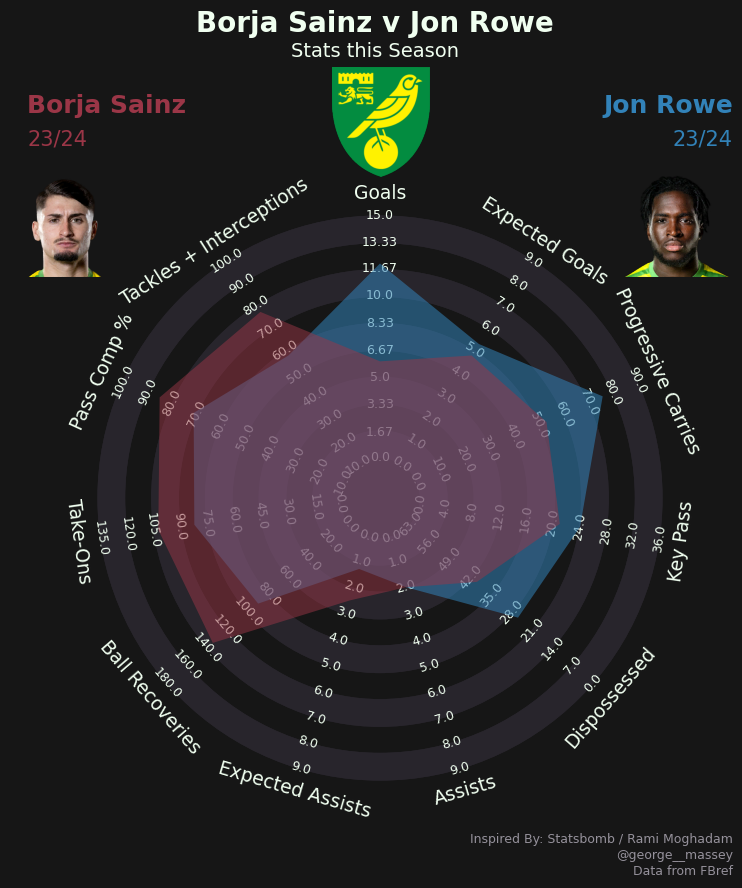

In [232]:
radar = Radar(background_color="#161616", patch_color='#28252C', label_fontsize=13.5, label_color='#F0FFF0', range_fontsize=9, range_color='#F0FFF0')

fig, ax = radar.plot_radar(ranges=ranges, params=params, values=values, 
                           radar_color=['#3282b8','#9B3647'], alphas=[0.55,0.5], 
                           title=title, endnote=endnote, compare=True, image_coord=(0.458, 0.8, 0.11, 0.11),
                           image="C:/Users/George/Documents/Football Analytics/Team Logos/norwich city_logo.png" )

ax2 = fig.add_axes([.625,.7,.07,.11])
ax2.axis('off')
img = Image.open("C:\\Users\\George\\Documents\\Football Analytics\\Images\\Rowe.png")
ax2.imshow(img)
ax3 = fig.add_axes([.32,.7,.07,.11])
ax3.axis('off')
img2 = Image.open("C:\\Users\\George\\Documents\\Football Analytics\\Images\\Sainz.webp")
ax3.imshow(img2)
fig.text(0.51, 0.945, 'Borja Sainz v Jon Rowe', ha='center', fontsize=20, color='#F0FFF0', fontweight='bold')
fig.text(0.51, 0.92, 'Stats this Season', ha='center', fontsize=14, color='#F0FFF0')


In [233]:
fig.savefig(
    "C:/Users/George/Documents/Football Analytics/Visuals/Sainz_Rowe.png",
    facecolor=ax.get_facecolor(),
    dpi=200,
    bbox_inches="tight"
)

findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.


findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Fo